## Questão 1
**R** - Como pedido na questão, foi feita uma discretização de um sinal senoidal e periodico com 3,5,10 e 50 amostras por ciclo. Rodando o codigo abaixo é possivel observar nos graficos que quanto maior o numero de amostras maior é a aproximação do sinal continuo. com 50 amostras para esse sinal especifico já é possivel identificar qual a função que modela ele. Porém com 3 ou 5 não da pra ter uma noção qual função esse grafico está discretizando.

In [ ]:
from math import sin,pi
import matplotlib.pyplot as plt

val_amostras = [3,5,10,50]
y=[]
for amostra in val_amostras:
    for n in range(amostra):
        y.append(sin(2*pi*n/amostra))
        
    plt.scatter([range(len(y))],y, s=14)
    plt.grid(True)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.show()
    y.clear()

## 2ª Questão

**R** - A forma expandida da equação fica:
$$
\ C = x + i\cdot y
$$
$$
\ a = x_a + i\cdot y_a
$$
$$
\ C\cdot \exp(a \cdot n) = \exp(x_a \cdot n) \cdot [x \cdot \cos(y_a \cdot n) + x \cdot i \cdot \sin(y_a \cdot n) + y \cdot i \cdot \cos(y_a \cdot n) - y \cdot \sin(y_a \cdot n)]
$$

Logo, é possível observar que para o sinal ser puramente exponencial basta colocar $y_a = 0$. Para um sinal apenas senoidal colocaremos $x_a = 0$. E para um sinal amortecido $y_a$ &ne; 0 e $x_a$ &ne; 0. 

Importante resaltar que quanto maior o numero de amostras e  menor tem que os valores de a para poder observa seu comportamento graficamente. Outro ponto importante é que a variavel C implica na amplitude de ambos os sinais. (Real e imaginario)


In [ ]:
import numpy as np
C = complex(3,2)
a_exp = complex(.06,0)
a_osc = complex(0,.2)
a_amortecido = complex(-.04,.4)

v_abc = [(C,a_exp),(C,a_osc),(C,a_amortecido)]

y=[]
num_de_amostras = 100
for tuple in v_abc:
    C,a = tuple
    for n in range(num_de_amostras):
        y.append(C* np.exp(a*n))
    plt.scatter(range(len(np.real(y))),y, s=14)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.grid(True)
    plt.show()
    y.clear()

## Questão 3

**R** - Para demonstrar a propriedade dos sinais discretos de que o valor de W alo não implica diretamente em uma alta frequencia escolhi valores de w = [(2/10)*pi, pi, 2*pi].

In [ ]:
frequencias_w = [.2*pi, pi, 2*pi]
amostras = 30
j = complex(0,1)
for w in frequencias_w:
    for n in range(amostras):
        y.append(np.exp(j*w*n))
    plt.scatter(range(len(np.real(y))),y, s=14)
    plt.ylim(-1.05,1.05)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.grid(True)
    plt.show()
    y.clear()

[0. 0. 0. 0. 0. 1. 1. 1. 0.]


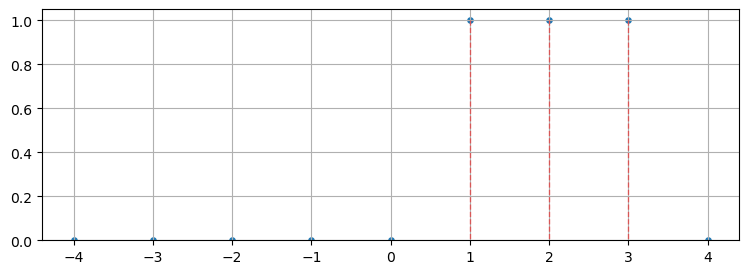

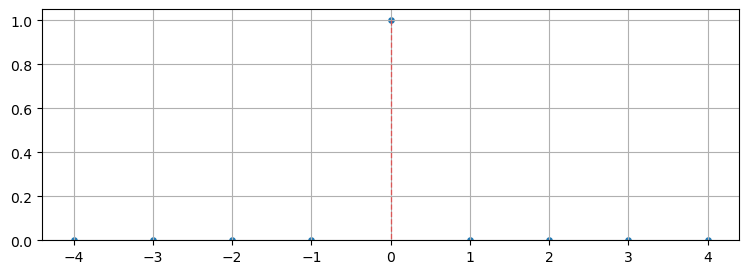

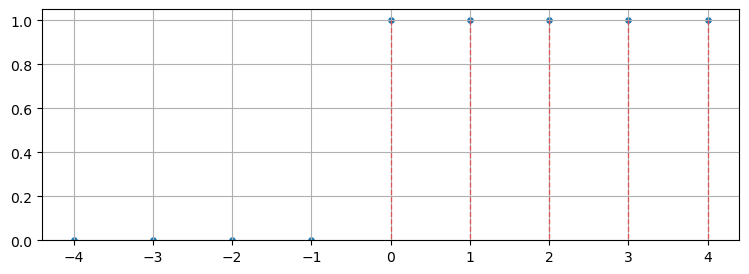

In [26]:

def impulso_unit_idpnt(n_amostras):
    y = [1 if index == 0 else 0 for index in range(-n_amostras//2 + 1,n_amostras//2)]
    return y

def degrau_unit_idpnt(n_amostras):
    y = [1 if index <= 0 else 0 for index in range(-n_amostras//2 + 1,n_amostras//2)]
    return y

def degrau_from_impulso(impulso):
    s = 0
    y = []
    for elem in impulso:
        s += elem
        y.append(s)
    return y

def impulso_from_degrau(degrau):    
    return np.diff(degrau)

def onda_from_impulso(impulso,passos, delay):
    onda = np.zeros(len(impulso))
    for i in range(len(impulso)):
        if impulso[i] == 1: onda[i+delay:i+passos+delay]=passos*[1]
    print(onda)
    return onda


n_amostras = 10
x = [index for index in range(-n_amostras//2 + 1,n_amostras//2)]
y_impulso = impulso_unit_idpnt(n_amostras)
onda = onda_from_impulso(y_impulso, 3,1)
y_degrau = degrau_from_impulso(y_impulso)

plt.figure(figsize=(9,3))
plt.scatter(x,onda, s=14)
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [onda[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.scatter(x,y_impulso, s=14)
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_impulso[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.scatter(x,y_degrau, s=14)
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_degrau[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import display
from PIL import Image
import numpy as np

# Abrir a imagem
imagem = Image.open('./Lenna.png')
imagem_v = np.array(imagem)
v_size = len(imagem_v)

# Inverter a imagem
imgs = [('Invertida horizontalmente',imagem_v[::, ::-1] ),
        ('Invertida verticalmente',imagem_v[::-1, ::] ),
        ('Invertida vert/horizontalmente',imagem_v[::-1, ::-1] ),
        ('Cortada inferior',imagem_v[:v_size-40, ::] ),
        ('Cortada lateralmente',imagem_v[:, :v_size-100] ),
        ('Cortada inferior/lateralmente',imagem_v[:v_size-100, :v_size-100] ),]

fig, axes = plt.subplots(2,3, figsize=(8, 8))

# Loop para plotar cada imagem em um subplot
for i, ax in enumerate(axes.ravel()):
    ax.imshow(np.array(imgs[i][1]))  # Converte a imagem PIL em um array numpy
    ax.set_title(imgs[i][0])
    ax.axis('off')  # Desabilita os eixos
    
# Ajusta o layout
plt.tight_layout()

# Exibe a figura
plt.show()

